#Imports and Functions

In [11]:
import pydot
import time
from collections import defaultdict
from IPython.display import Image, display

In [4]:
def lstr(p):
    return ''.join([str(elem) for elem in p])

#1. Pancake Network and Pn Calculation

In [5]:
def PancakeNetwork(s):
    os = s
    n = s[-1]
    o = lstr(s)
    graph = defaultdict()
    visited = set()

    queue = []

    queue.append(s)
    visited.add(lstr(s))

    while queue:
        s = queue.pop(0)

        graph[lstr(s)]=[]

        for i in range(len(s)-1):

            d = s[i+1::-1] + s[i+2:]

            if not(lstr(d) in visited):
                
                queue.append(d)

                graph[lstr(s)].append(lstr(d))
                visited.add(lstr(d))

    def pn(k):
        depth = -1
        for i in graph[k]:
            depth = max(depth, pn(i))
        return(depth + 1)
    maxDepth = (pn(o))

    def maxDepthNodes(k, max):
        maxNodes = ""
        if(max == 0):
            return k
        for i in graph[k]:
            maxNodes += (maxDepthNodes(i, max - 1)) + " "
        return(maxNodes)
    maxNodes = maxDepthNodes(o, maxDepth).split()

    #Generate Graph
    visited = set()
    G = pydot.Dot(graph_type="graph", simplify=True)

    queue = []

    queue.append(os)
    visited.add(lstr(os))

    while queue:
        s = queue.pop(0)

        if s == sorted(s):
            node = pydot.Node(lstr(s),style="filled", fillcolor="green")
        else:
            node = pydot.Node(lstr(s))

        G.add_node(node)

        for i in range(len(s)-1):

            d = s[i+1::-1] + s[i+2:]

            if not(lstr(d) in visited):

                node = pydot.Node(lstr(d))
                G.add_node(node)
                edge = pydot.Edge(lstr(s),lstr(d))
                G.add_edge(edge)
                
                queue.append(d)

                graph[lstr(s)].append(lstr(d))
            visited.add(lstr(s))       
    
    for i in maxNodes:
        node = pydot.Node(i,style="filled", fillcolor="yellow")
        G.add_node(node)

    im = Image(G.create_png())
    display(im)
    print("n =", n)
    print("Pn =", maxDepth)
    print("#########################")

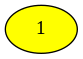

n = 1
Pn = 0
#########################


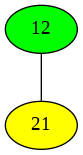

n = 2
Pn = 1
#########################


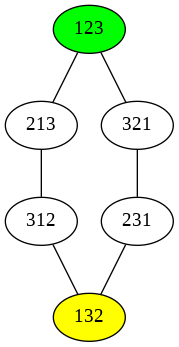

n = 3
Pn = 3
#########################


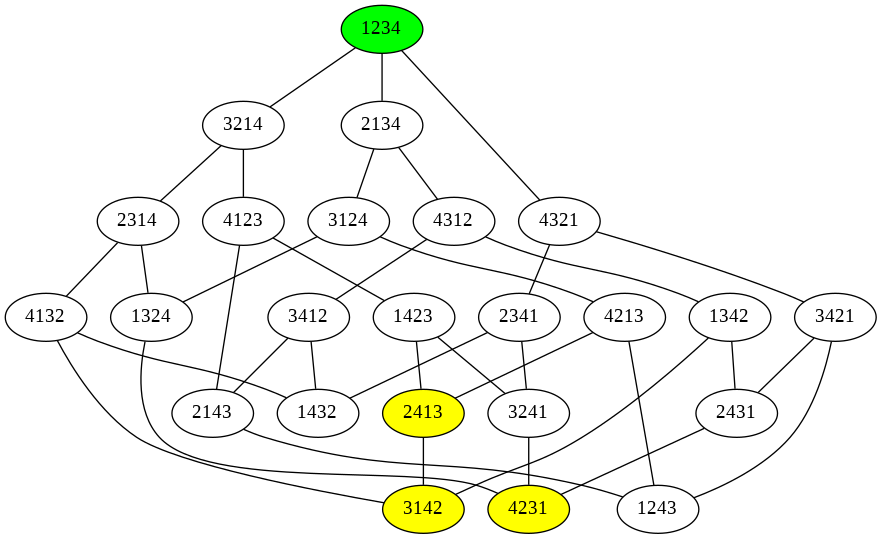

n = 4
Pn = 4
#########################


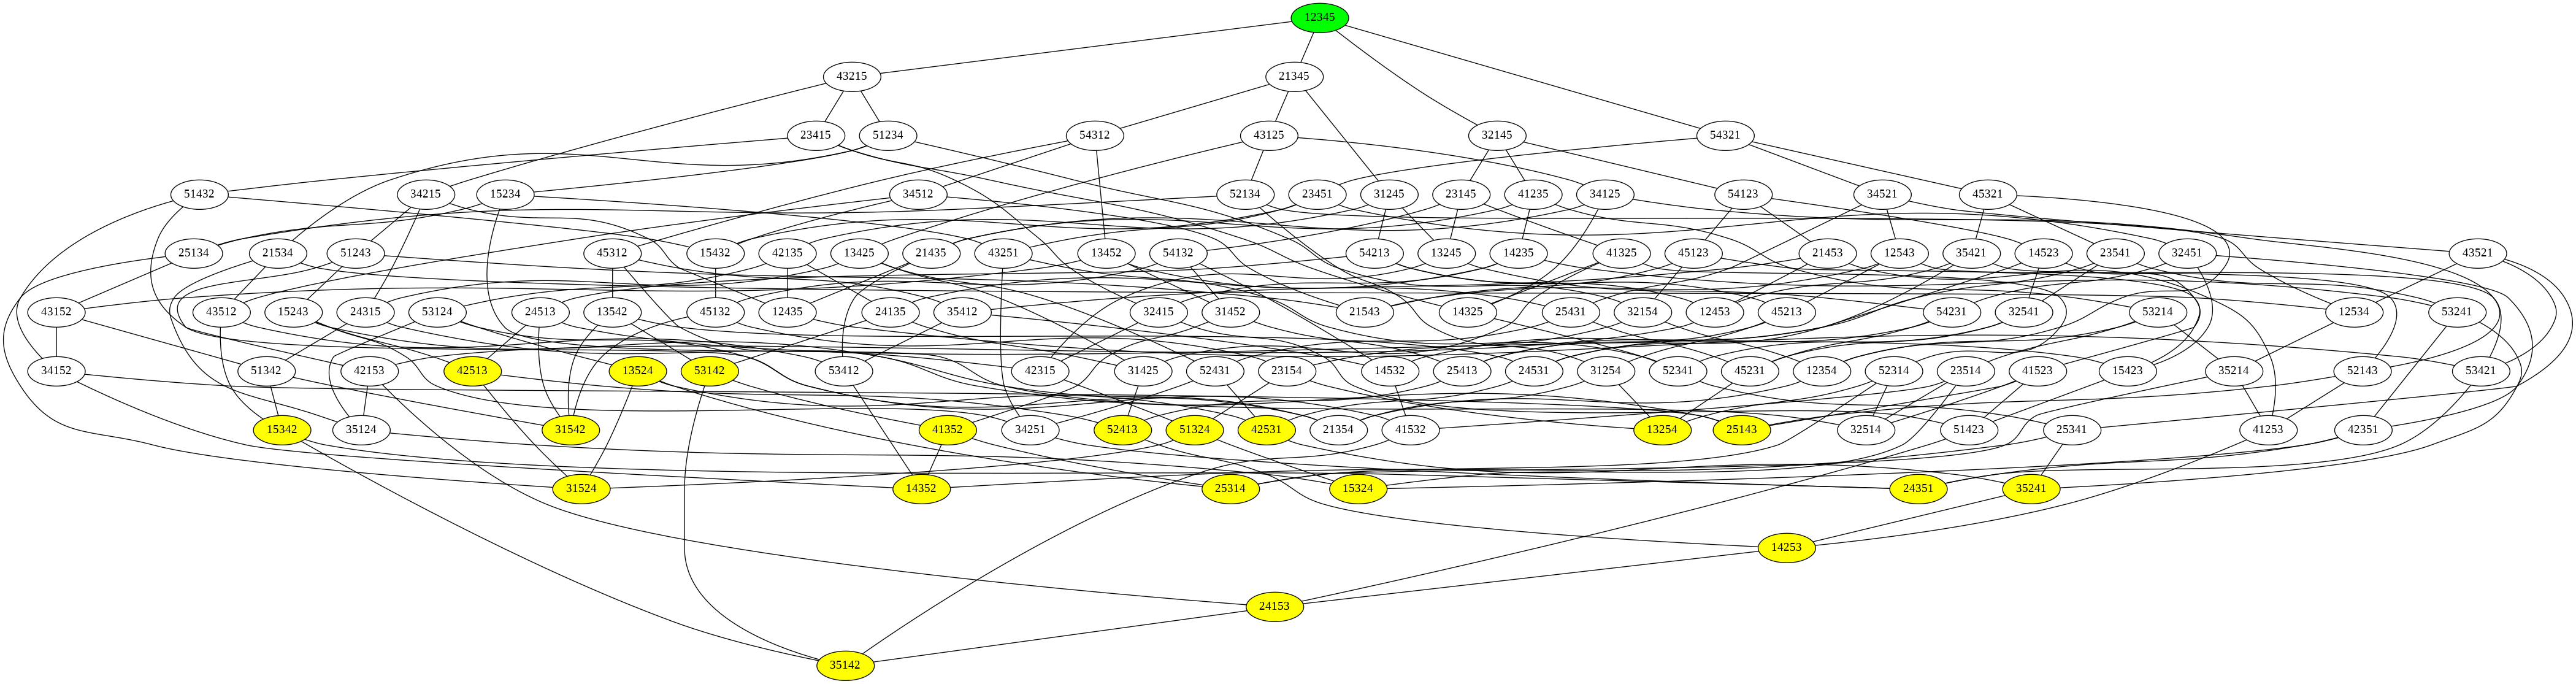

n = 5
Pn = 5
#########################


In [6]:
n=5

for i in range(1, n+1):
    PancakeNetwork([*range(1, i+1)])

#2. Largest Pn Calculated

In [12]:
def minPancakeTree(s):
    n = str(s[-1])
    o = lstr(s)
    graph = defaultdict()
    visited = set()

    queue = []

    queue.append(s)
    visited.add(lstr(s))

    while queue:
        s = queue.pop(0)

        graph[lstr(s)]=[]

        for i in range(len(s)-1):

            d = s[i+1::-1] + s[i+2:]

            if not(lstr(d) in visited):
                
                queue.append(d)

                graph[lstr(s)].append(lstr(d))
                visited.add(lstr(d))

    def pn(k):
        depth = -1  
        for i in graph[k]:
            depth = max(depth, pn(i))
        return(depth + 1)
    print("Pn(" + n + ") =", pn(o))
    print(time.strftime("%m/%d/%Y, %H:%M:%S", time.localtime()))

In [13]:
n = 1000
for i in range(5, n+1):
    minPancakeTree([*range(1, i+1)])

Pn(5) = 5
11/22/2020, 04:08:24
Pn(6) = 7
11/22/2020, 04:08:24
Pn(7) = 8
11/22/2020, 04:08:24
Pn(8) = 9
11/22/2020, 04:08:27
Pn(9) = 10
11/22/2020, 04:09:00
Pn(10) = 11
11/22/2020, 04:42:16


KeyboardInterrupt: ignored

#3. Pancake Tree w. Two Spatulas

In [7]:
def inFixPancakeTree(s):
    visited = set()
    G = pydot.Dot(graph_type="digraph")
    
    queue = []

    queue.append(s)
    visited.add(lstr(s))

    while queue:
        s = queue.pop(0)

        node = pydot.Node(lstr(s))
        G.add_node(node)

        if(s != sorted(s)):
            for j in range(len(s)):
                for i in range(len(s)-j-1):

                    st = s[j:]
                    d = s[:j] + st[i+1::-1] + st[i+2:]

                    if not(lstr(d) in visited):
                        
                        if(d == sorted(d)):
                            node = pydot.Node(lstr(d),style="filled", fillcolor="green")
                        else:
                            node = pydot.Node(lstr(d))
                        
                        G.add_node(node)
                        edge = pydot.Edge(lstr(s),lstr(d))
                        G.add_edge(edge)

                        queue.append(d)
                        visited.add(lstr(d))

    im = Image(G.create_png())
    display(im)

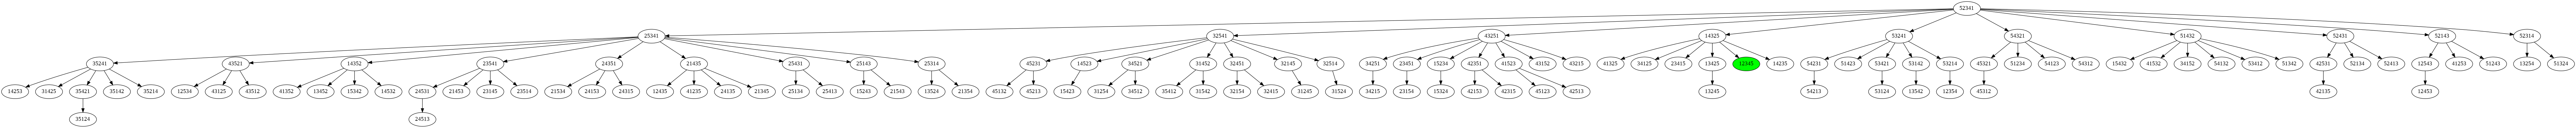

In [8]:
p = [5,2,3,4,1]
inFixPancakeTree(p)

#Original

![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

In [ ]:
def lstr(p):
        return ''.join([str(elem) for elem in p])

In [180]:
def ModifiedBFS(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

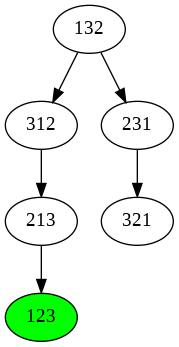

In [181]:
p = [1,3,2]
ModifiedBFS(p)

In [ ]:
def ModifiedBFSPreSols(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                     node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

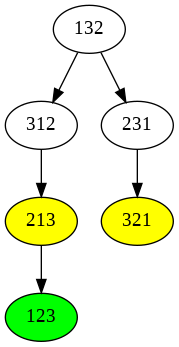

In [ ]:
p = [1,3,2]
ModifiedBFSPreSols(p)

In [ ]:
def ModifiedBFSPreSolsLevel(s,L):  

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)) and (l < L):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                     node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

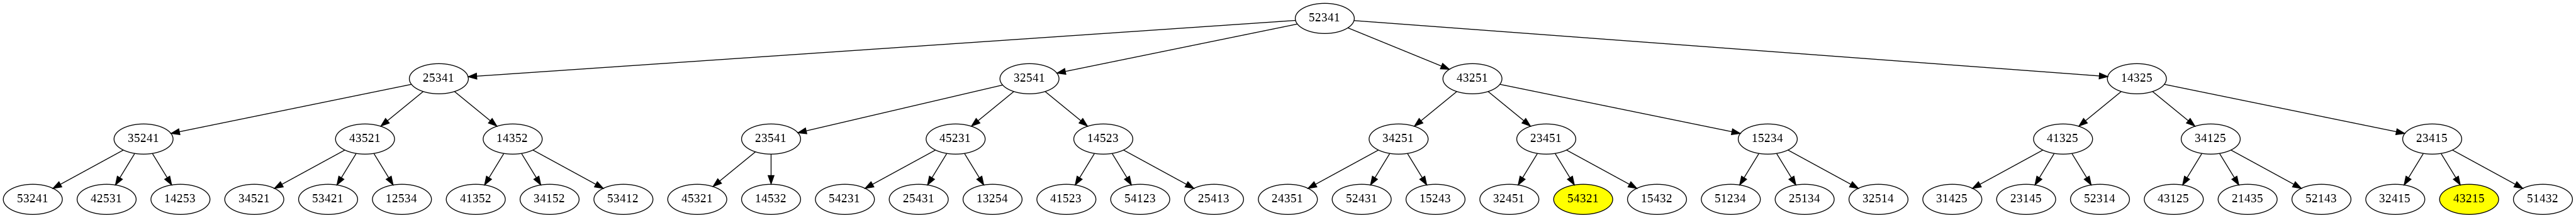

In [ ]:
p = [5,2,3,4,1]
ModifiedBFSPreSolsLevel(p,3)

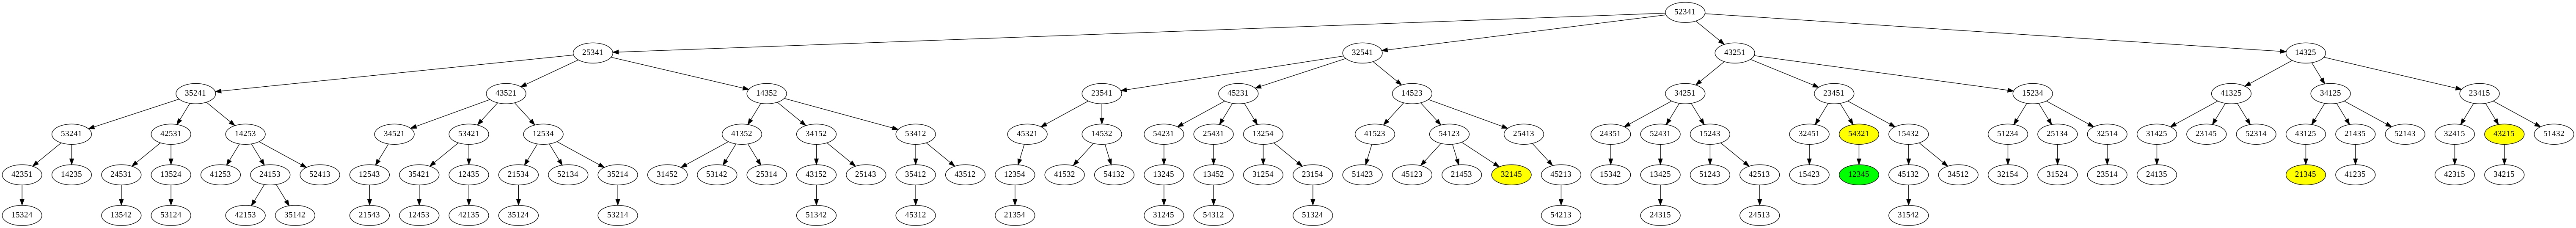

In [ ]:
ModifiedBFSPreSolsLevel(p,5)

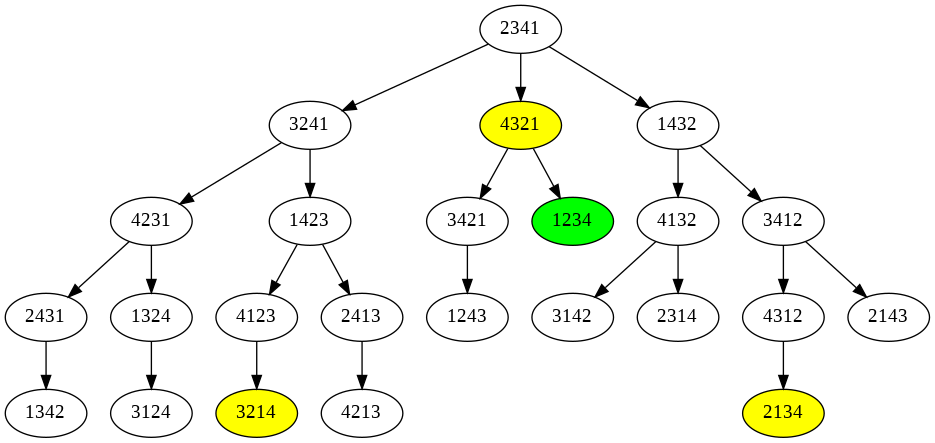

In [ ]:
p = [2,3,4,1]
ModifiedBFSPreSolsLevel(p,5)

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


